In [ ]:
#this function will input preprocessed encoded, complete, fully numeric data and send through an XGBoost

#for more information on XGBoost and overtuning
#https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

In [1]:
#import libraries
import time
import os

import numpy as np
from numpy.random import randn
import pandas as pd

import math
from math import sqrt
import statistics as stat

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix, balanced_accuracy_score
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix

import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
#import the file, you may have to import the location too
data = pd.read_csv('/media/titan/Storage 6/00_Datasets/IoT_datasets/TON-IoT/TON_processed.csv')

X = data.drop(['type'], axis = 1)     #X are the features
y = data['type']                      #y is the label

In [6]:
#we will compare this with the 75/25, 65/35 split as well
tsz = 0.35

#split the data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsz, shuffle=True)

#set up for the parameters num_class
l = len(data['type'].unique())    

#normalize the data
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
    
startTime = time.time()
#transform numpy array into DMatrix format for xgboost
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

#parameters
param = {
    'max_depth':6,
    'eta': 0.35,
    'objective': 'multi:softmax',
    'num_class': l,
    'eval_metric': 'merror'}
    
epochs = 50

#train the model
model = xgb.train(param, train, epochs)

#make predictions
predictions = model.predict(test)

#time() returns the time as a floating point number expressed in seconds since the epoch, in UTC.
executionTime = (time.time() - startTime)

In [7]:
#metrics
precision = precision_score(y_test, predictions, average= 'macro')
bal_accuracy = balanced_accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average= 'macro')
recall = recall_score(y_test, predictions, average= 'macro')
MeanSq = sqrt(mean_squared_error(y_test, predictions))

#https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification

#"macro" simply calculates the mean of the binary metrics, giving equal weight to each class. 
#In problems where infrequent classes are nonetheless important, macro-averaging may be a means
#of highlighting their performance. On the other hand, the assumption that all classes are equally
#important is often untrue, such that macro-averaging will over-emphasize the typically low performance
#on an infrequent class


#the balanced accuracy, which avoids inflated performance estimates on imbalanced datasets. 
#It is the macro-average of recall scores per class or, equivalently, raw accuracy where each 
#sample is weighted according to the inverse prevalence of its true class. 
#Thus for balanced datasets, the score is equal to accuracy.

/home/titan/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#prints the metrics
print('Execution time in seconds: ', executionTime)

#average scores
print('Precision: ', precision * 100.00)
print('Balanced Accuracy: ', bal_accuracy * 100.00)
print('F1: ', f1 * 100.00)
print('Recall: ', recall * 100.00)
print('RMSE: ', MeanSq)

Execution time in seconds:  197.48071193695068
Precision:  50.36679808608119
Balanced Accuracy:  13.164860479197962
F1:  12.843369717569963
Recall:  13.164860479197962
RMSE:  1.0582654622619387


In [9]:
print(classification_report(y_test, predictions, digits=4))

/home/titan/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/titan/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.8566    0.9996    0.9226   1063518
           1     0.7936    0.0207    0.0404     85728
           2     0.0000    0.0000    0.0000     18832
           3     0.8739    0.0169    0.0332     17597
           4     0.8386    0.0155    0.0305     49802
           5     0.6667    0.0004    0.0007      5588
           6     0.0000    0.0000    0.0000      1356
           7     0.0000    0.0000    0.0000      2132

    accuracy                         0.8565   1244553
   macro avg     0.5037    0.1316    0.1284   1244553
weighted avg     0.8356    0.8565    0.7929   1244553



/home/titan/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

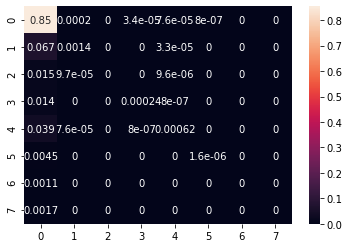

In [10]:
cm=confusion_matrix(y_test,predictions, normalize='all')
sns.heatmap(cm, annot=True)